#### - Sobhan Moradian Daghigh
#### 
#### - 1/7/2022
#### 
#### - ML - EX03 - Q2 and Q3

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from mpl_toolkits.mplot3d import Axes3D

### Q2

In [415]:
label = [0, 0, 0, 1, 1, 1]
X1 = [1, 2, 2, 0, 0, 1]
X2 = [1, 2, 0, 0, 1, 0]
dataset = pd.DataFrame([X1, X2, label]).T
dataset

,0,1,2
0,1,1,0
1,2,2,0
2,2,0,0
3,0,0,1
4,0,1,1
5,1,0,1


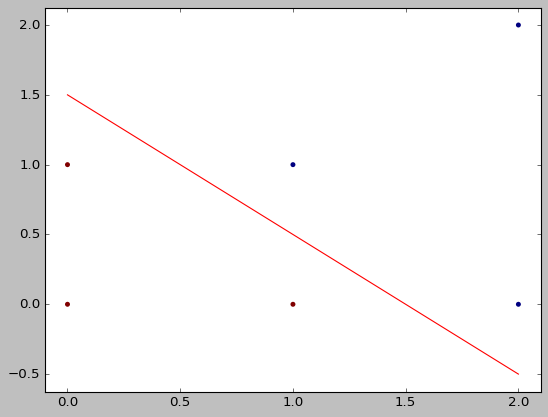

In [416]:
clf = svm.SVC(kernel='linear', C= 100)
clf.fit(dataset.iloc[:, :-1], dataset.iloc[:, -1])
w = clf.coef_[0]
b = clf.intercept_[0]
x_points = np.linspace(0, 2)
y_points = -(w[0] / w[1]) * x_points - b / w[1]

with plt.style.context(plt.style.available[5]):
    plt.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1], c=label)
    plt.plot(x_points, y_points, c='r')

In [413]:
clf.coef_

array([[-2.,  0.]])

In [414]:
clf.intercept_

array([1.])

### Q3

In [373]:
label = [0, 1, 1]
X1 = [0, -1, 1]
dataset = pd.DataFrame([X1, label]).T
dataset

,0,1
0,0,0
1,-1,1
2,1,1


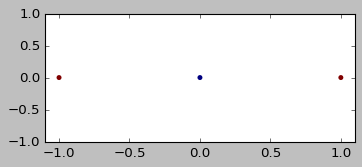

In [374]:
with plt.style.context(plt.style.available[5]):
    fig = plt.figure(figsize=(5, 2))
    plt.scatter(dataset.iloc[:, :-1], [0] * 3, c=label)
    plt.ylim(-1, 1)

In [375]:
def apply_kernel(x):
    return [1, np.multiply(np.sqrt(2), x), np.power(x, 2)]

In [376]:
transferred = [] 
for x in dataset.iloc[:, 0]:
    transferred.append(apply_kernel(x))
    
df = pd.DataFrame(transferred)
df['label'] = label
df

,0,1,2,label
0,1,0.000000,0,0
1,1,-1.414214,1,1
2,1,1.414214,1,1


C:\Users\VIRGIL~1\AppData\Local\Temp/ipykernel_30028/1871571276.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes1 = fig.gca(projection = '3d')


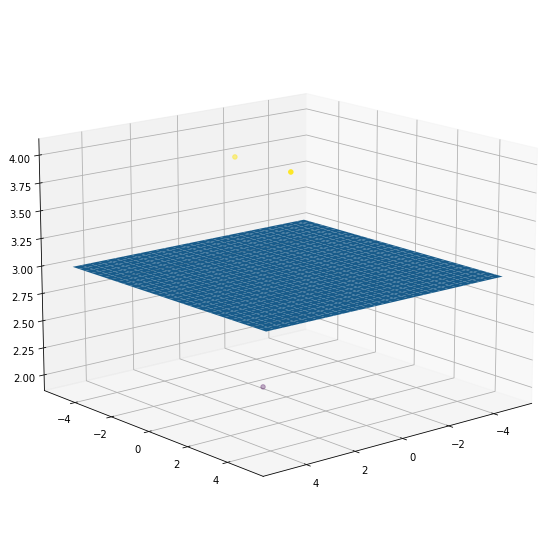

In [410]:
X = df.iloc[:, :-2].values
Y = df.iloc[:, -1].values

X1 = X[:, 0].reshape((-1, 1))
X2 = X[:, 1].reshape((-1, 1))
X3 = (X1**2 + X2**2 + 1)
X = np.hstack((X, X3))

model = svm.SVC(kernel='linear')
clf = model.fit(X, Y)

w, b = clf.coef_, clf.intercept_
tmp = np.linspace(-5,5,30)
x1, x2 = np.meshgrid(tmp, tmp)
x3 = - (b + w[0][0] * x1 + w[0][1] * x2) / w[0][2]

fig = plt.figure(figsize=(10, 10))
axes2 = fig.add_subplot(111, projection = '3d')
axes2.scatter(X1, X2, X3, c = Y, depthshade = True)
axes1 = fig.gca(projection = '3d')
axes1.plot_surface(x1, x2, x3, alpha = 1)
axes1.view_init(15, 50)
plt.show()